In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
import pandas as pd

In [8]:
tickers_list = ['^GSPC', '000300.SS', '^STOXX50E']
names = ['S&P 500', '滬深300', 'Euro Stoxx 50'] 

In [9]:
start_date = '2018-01-01'
end_date = '2025-01-01'

In [10]:
price_data = pd.DataFrame()

In [12]:
for ticker in tickers_list:
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    price_data[ticker] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
returns = price_data.pct_change().dropna()

C:\Users\abbie\AppData\Local\Temp\ipykernel_13636\56511947.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = price_data.pct_change().dropna()


In [14]:
corr_matrix = returns.corr()
corr_matrix.columns = names
corr_matrix.index = names

print("📊 2018~2025 各市場指數報酬率的相關係數矩陣：")
print(corr_matrix)

📊 2018~2025 各市場指數報酬率的相關係數矩陣：
                S&P 500     滬深300  Euro Stoxx 50
S&P 500        1.000000  0.056241       0.516774
滬深300          0.056241  1.000000       0.130937
Euro Stoxx 50  0.516774  0.130937       1.000000


C:\Users\abbie\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 28396 (\N{CJK UNIFIED IDEOGRAPH-6EEC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\abbie\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anacon

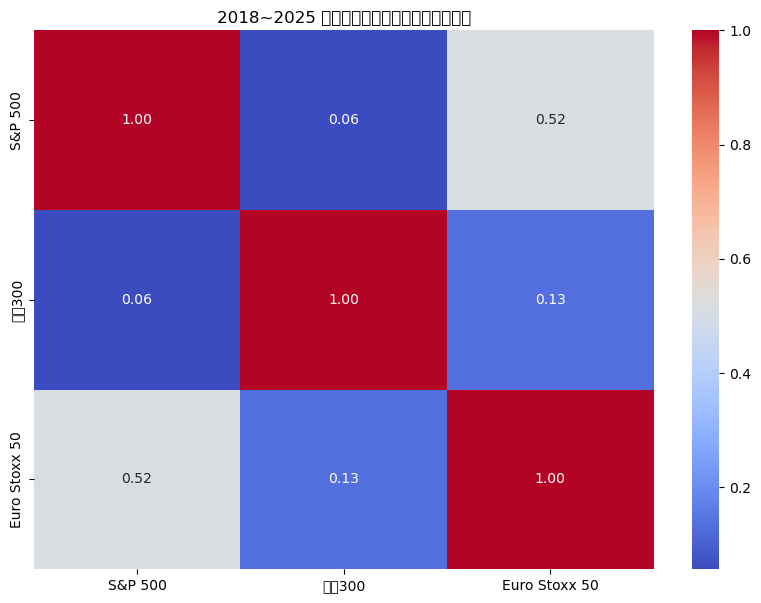

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2018~2025 全球主要市場指數報酬率相關係數")
plt.show()